<a href="https://colab.research.google.com/github/SatyaHarshithaDanda/Ecommerce-Website-Logs/blob/main/EcommerceWebsiteLogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ecommerce Website Logs Analysis Model**
By Satya Harshitha Danda

In [1]:
# upload the csv file
from google.colab import files
uploaded = files.upload()

Saving E-commerce Website Logs.csv to E-commerce Website Logs.csv


In [4]:
import pandas as pd

In [5]:
#Load the CSV file into a DataFrame
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

<ipython-input-5-a92062675271>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


In [6]:
# Initial overview of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
             accessed_date  duration_(secs) network_protocol             ip  \
0  2017-03-14 17:43:57.172             2533            TCP     1.10.195.126   
1  2017-03-14 17:43:57.172             4034            TCP      1.1.217.211   
2  2017-03-14 17:43:26.135             1525            TCP    1.115.198.107   
3  2017-03-14 17:43:26.135             4572            TCP    1.121.152.143   
4  2017-03-14 18:17:09.005             3652            TCP    1.123.135.213   

    bytes    accessed_Ffom age  gender country membership language     sales  \
0   20100           Chrome  28  Female      CA     Normal  English  261.9600   
1   20500  Mozilla Firefox  21    Male      AR     Normal  English  731.9400   
2   90100  Mozilla Firefox  20    Male      PL     Normal  English   14.6200   
3  100300  Mozilla Firefox  66  Female      IN     Normal  Spanish  957.5775   
4  270200  Mozilla Firefox  53  Female      KR     Normal  Spanish   22.3680   

  returned 

In [7]:
print("\nDataFrame information:")
print(df.info())


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               99457 non-null   object 
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory u

In [8]:
print("\nDescriptive statistics:")
print(df.describe(include='all'))


Descriptive statistics:
                  accessed_date  duration_(secs) network_protocol  \
count                    172838    172838.000000           172838   
unique                    81747              NaN                5   
top     2017-03-16 14:11:19.530              NaN            TCP     
freq                         10              NaN           127825   
mean                        NaN      3248.031827              NaN   
std                         NaN      1010.872270              NaN   
min                         NaN      1500.000000              NaN   
25%                         NaN      2371.000000              NaN   
50%                         NaN      3246.000000              NaN   
75%                         NaN      4124.000000              NaN   
max                         NaN      5000.000000              NaN   

                   ip          bytes accessed_Ffom    age  gender country  \
count          172838  172838.000000        172838  99457  172838  17

# Data Cleaning

In [9]:
# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
accessed_date           0
duration_(secs)         0
network_protocol        0
ip                      0
bytes                   0
accessed_Ffom           0
age                 73381
gender                  0
country                 0
membership              0
language                0
sales                   0
returned                0
returned_amount         0
pay_method              0
dtype: int64


In [10]:
# Convert 'age' to numeric, coercing errors and identifying non-numeric values
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [11]:
# Check the number of missing values in 'age' after conversion
missing_age = df['age'].isnull().sum()
print(f"\nMissing values in 'age' after conversion: {missing_age}")


Missing values in 'age' after conversion: 88124


In [12]:
# Optionally fill missing 'age' values with the mean or drop rows with missing 'age'
df['age'].fillna(df['age'].mean(), inplace=True)

In [13]:
# Standardize column names
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [14]:
# Check for missing values again
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
accessed_date       0
duration_(secs)     0
network_protocol    0
ip                  0
bytes               0
accessed_ffom       0
age                 0
gender              0
country             0
membership          0
language            0
sales               0
returned            0
returned_amount     0
pay_method          0
dtype: int64


In [15]:
# Handling outliers in 'sales'
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

In [16]:
# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
# Filter out outliers
df = df[(df['sales'] >= lower_bound) & (df['sales'] <= upper_bound)]

In [18]:
print("\nDataFrame shape after outlier removal:")
print(df.shape)


DataFrame shape after outlier removal:
(151695, 15)


# Descriptive Statistics

In [19]:
print("\nDescriptive statistics after cleaning:")
print(df.describe(include='all'))


Descriptive statistics after cleaning:
                  accessed_date  duration_(secs) network_protocol  \
count                    151695    151695.000000           151695   
unique                    80257              NaN                5   
top     2017-03-16 14:11:19.530              NaN            TCP     
freq                          9              NaN           111440   
mean                        NaN      3248.748139              NaN   
std                         NaN      1010.531770              NaN   
min                         NaN      1500.000000              NaN   
25%                         NaN      2372.000000              NaN   
50%                         NaN      3248.000000              NaN   
75%                         NaN      4125.000000              NaN   
max                         NaN      5000.000000              NaN   

                    ip          bytes accessed_ffom            age  gender  \
count           151695  151695.000000        151695  

# Exploratory Data Analysis (EDA)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [21]:
# Define specific colors to use across all plots
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

def plot_with_values(ax, kind='bar', **kwargs):
    """Helper function to add values on the plot."""
    if kind == 'bar':
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 8),
                        textcoords='offset points')
    elif kind == 'pie':
        for autotext in kwargs.get('autotexts', []):
            autotext.set_color('black')  # Set color for the text annotations


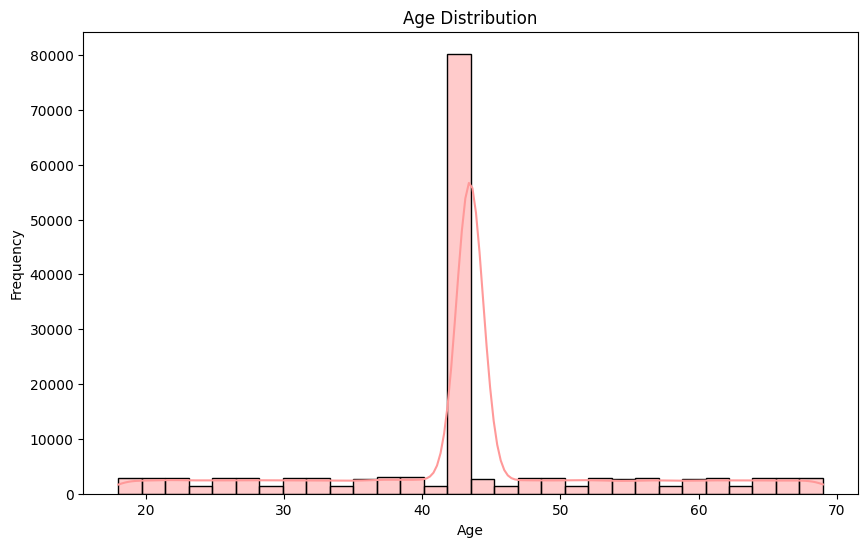

In [22]:
# Distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color=colors[0])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-23-36116c6b1c8a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette=colors)
<ipython-input-23-36116c6b1c8a>:4: UserWarning: 
The palette list has fewer values (4) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette=colors)


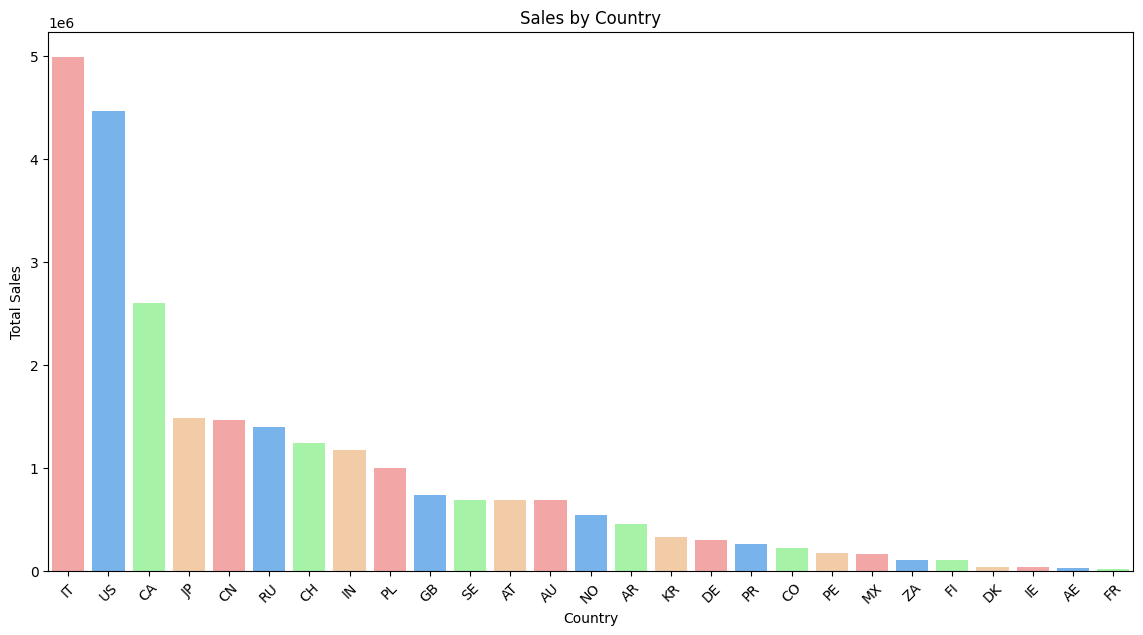

In [23]:
# Sales by country
plt.figure(figsize=(14, 7))
sales_by_country = df.groupby('country')['sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_country.index, y=sales_by_country.values, palette=colors)
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

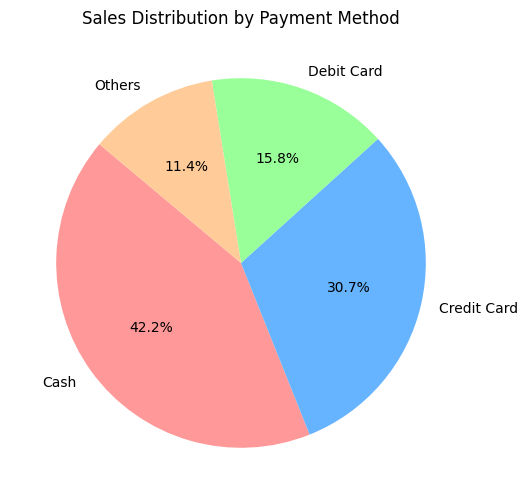

In [24]:
# Sales by payment method
plt.figure(figsize=(10, 6))
sales_by_payment = df.groupby('pay_method')['sales'].sum()
pie_colors = colors[:len(sales_by_payment)]
wedges, texts, autotexts = plt.pie(sales_by_payment, labels=sales_by_payment.index, colors=pie_colors, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Payment Method')
plot_with_values(plt.gca(), kind='pie', autotexts=autotexts)
plt.show()

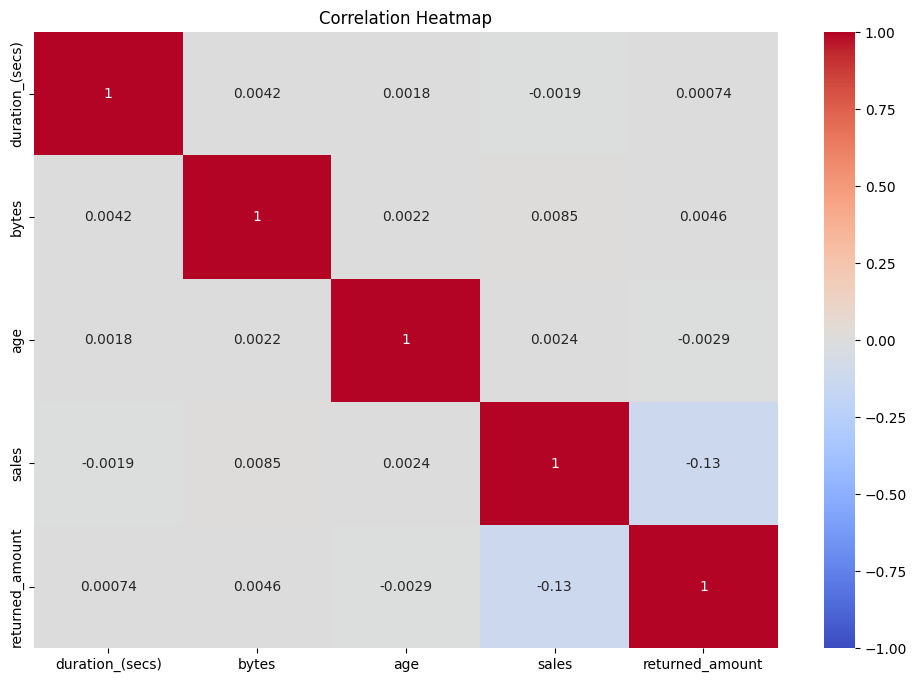

In [25]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Sales over time
df['accessed_date'] = pd.to_datetime(df['accessed_date'])
sales_over_time = df.groupby(df['accessed_date'].dt.date)['sales'].sum().reset_index()

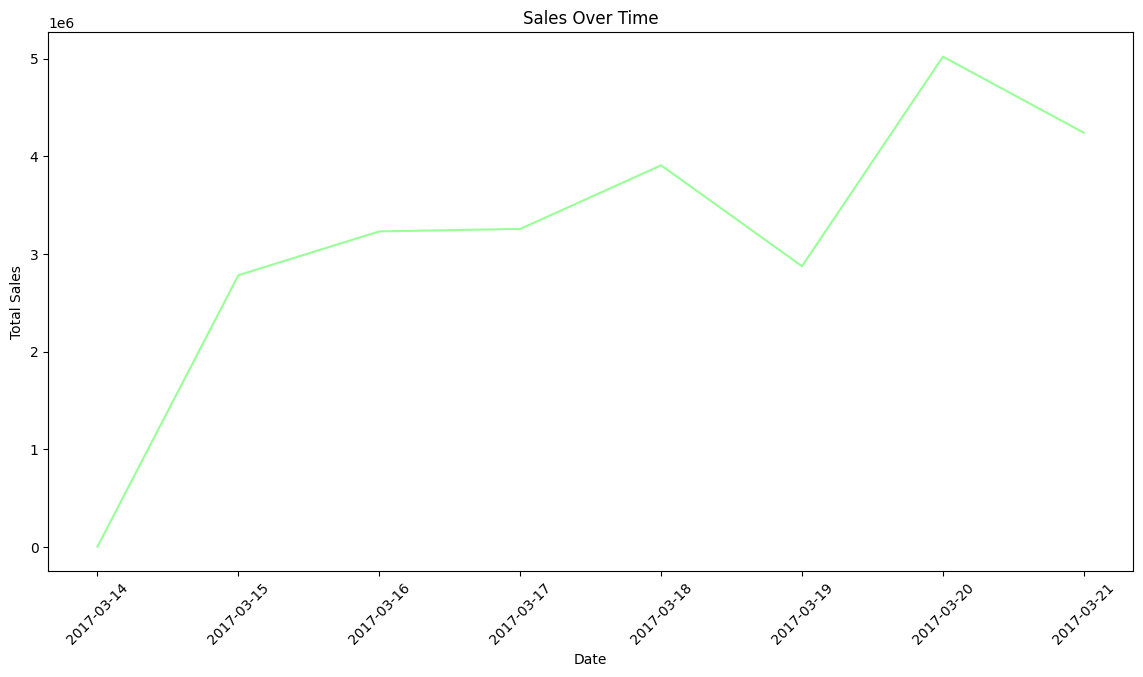

In [27]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='accessed_date', y='sales', data=sales_over_time, color=colors[2])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<ipython-input-28-2de154a1ce5a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='gender', y='sales', data=sales_by_gender, palette=colors)
<ipython-input-28-2de154a1ce5a>:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.barplot(x='gender', y='sales', data=sales_by_gender, palette=colors)


Text(0, 0.5, 'Total Sales')

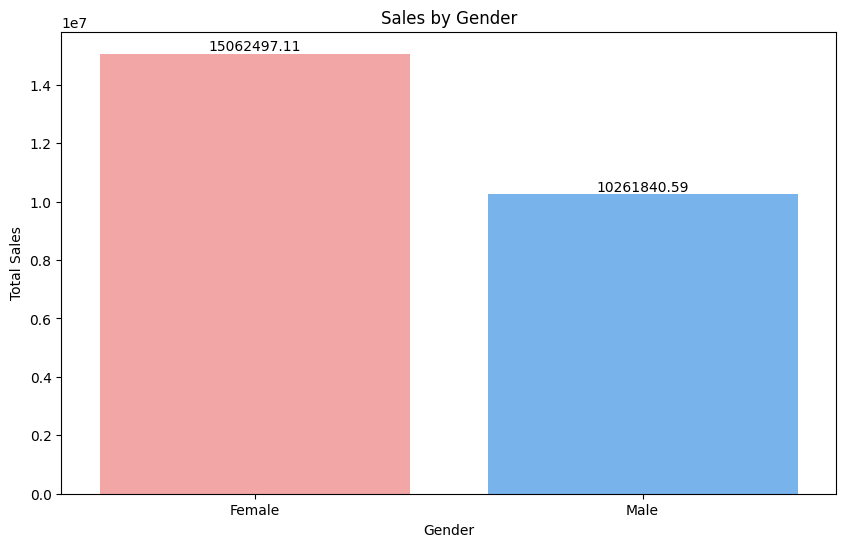

In [28]:
# Sales by gender
# Filter out entries where gender is 'Unknown'
df_filtered = df[df['gender'] != 'Unknown']

# Calculate total sales by gender
sales_by_gender = df_filtered.groupby('gender')['sales'].sum().reset_index()

# Plot Bar Chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='gender', y='sales', data=sales_by_gender, palette=colors)

# Add values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 100,  # Adjust position of the text
            f'{height:.2f}',  # Format value with 2 decimal places
            ha='center', va='bottom')

# Formatting
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')

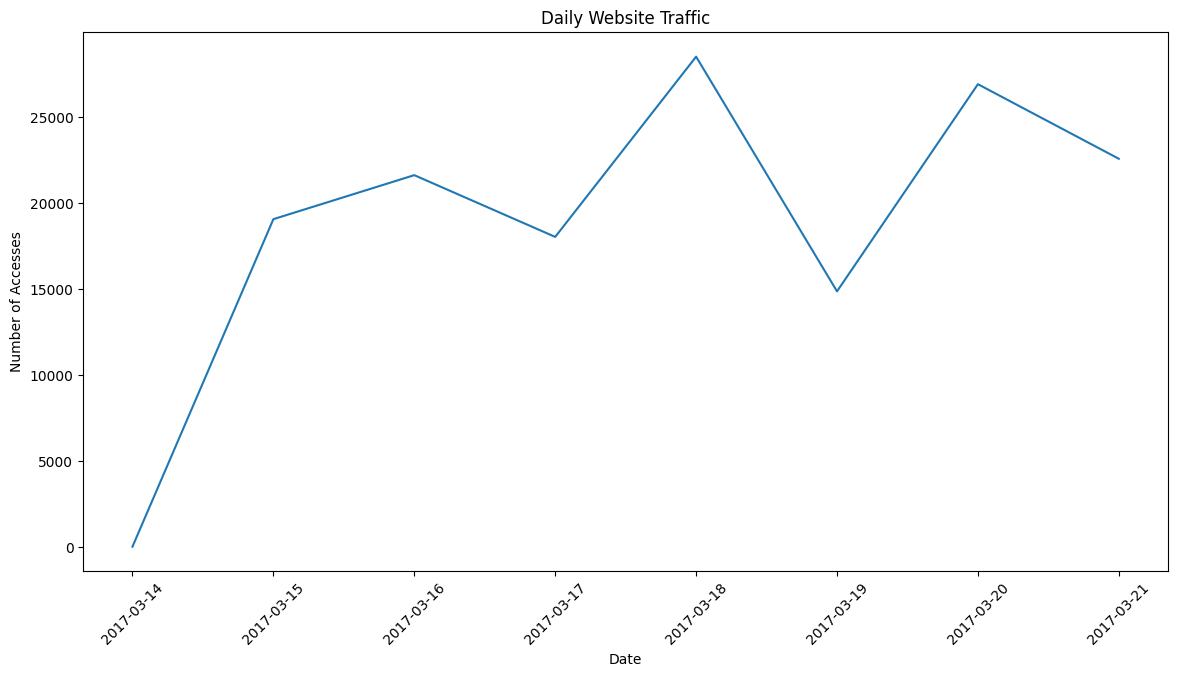

In [29]:
#Access Patterns Over Time
plt.figure(figsize=(14, 7))
daily_traffic = df.groupby(df['accessed_date'].dt.date).size()
sns.lineplot(x=daily_traffic.index, y=daily_traffic.values)
plt.title('Daily Website Traffic')
plt.xlabel('Date')
plt.ylabel('Number of Accesses')
plt.xticks(rotation=45)
plt.show()

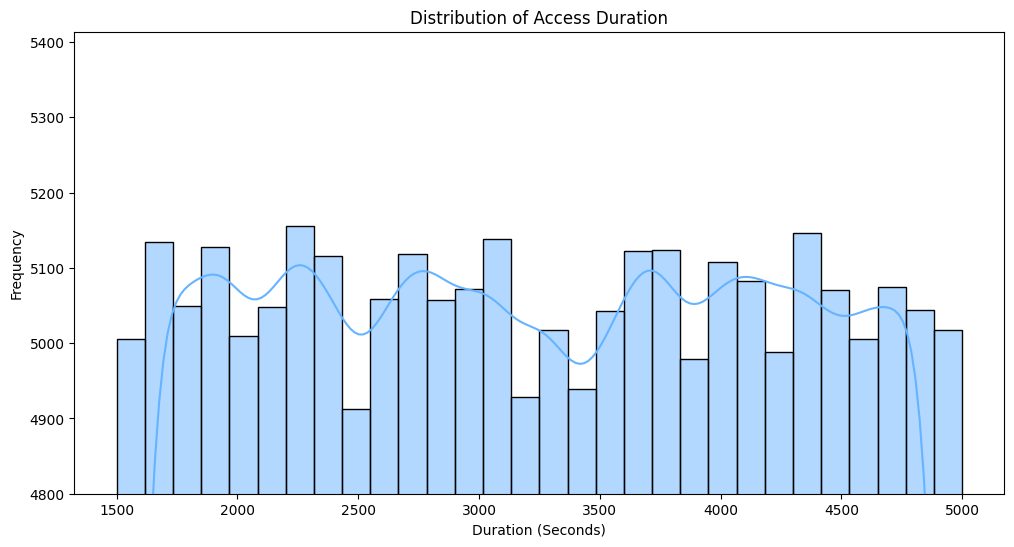

In [30]:
# Duration of Access
# Plot the histogram of access duration
plt.figure(figsize=(12, 6))
sns.histplot(df['duration_(secs)'], bins=30, kde=True, color=colors[1])

# Set the y-axis limit to start from 4800
plt.ylim(bottom=4800)

# Formatting
plt.title('Distribution of Access Duration')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-31-1773d73f53cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='network_protocol', data=df, palette=colors)
<ipython-input-31-1773d73f53cb>:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(y='network_protocol', data=df, palette=colors)


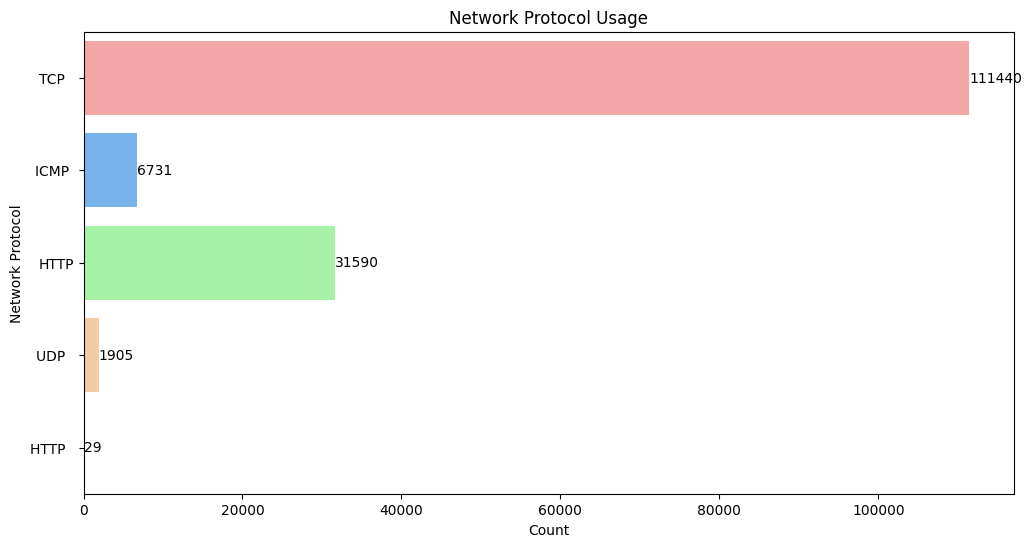

In [31]:
# Network Protocol Usage
# Plot the count of each network protocol
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='network_protocol', data=df, palette=colors)

# Add values at the end of each bar
for p in ax.patches:
    width = p.get_width()  # Get the width of the bar (i.e., the count)
    ax.text(width + 0.5, p.get_y() + p.get_height() / 2,
            f'{width:.0f}',
            ha='left', va='center')

# Formatting
plt.title('Network Protocol Usage')
plt.xlabel('Count')
plt.ylabel('Network Protocol')
plt.show()

<ipython-input-32-5df7112ff144>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='accessed_ffom', data=df, palette=colors)
<ipython-input-32-5df7112ff144>:4: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(y='accessed_ffom', data=df, palette=colors)


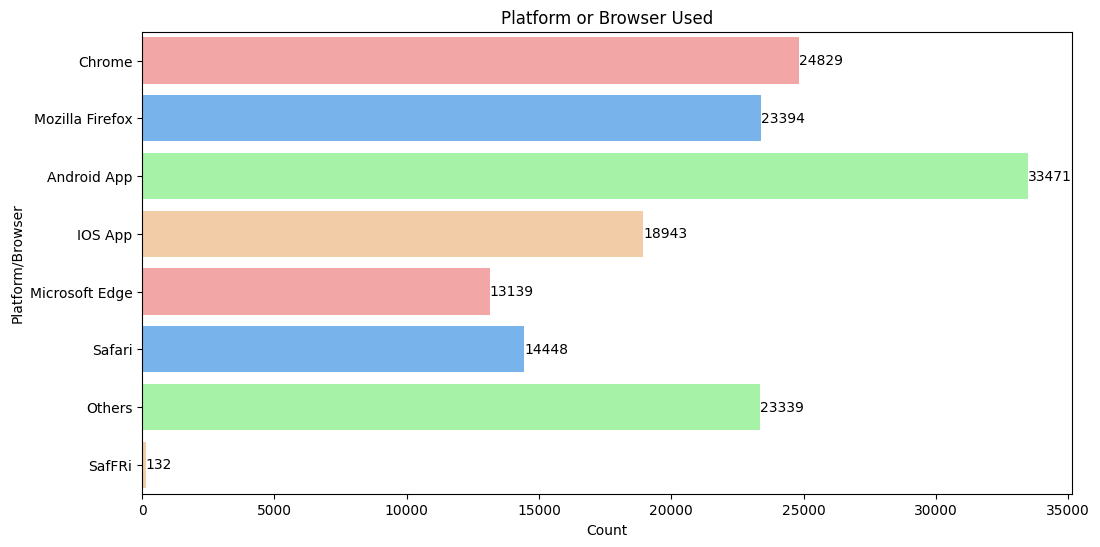

In [32]:
# Platform or Browser Used
# Plot the count of each platform or browser used
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='accessed_ffom', data=df, palette=colors)

# Add values at the end of each bar
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height() / 2,
            f'{width:.0f}',
            ha='left', va='center')

# Formatting
plt.title('Platform or Browser Used')
plt.xlabel('Count')
plt.ylabel('Platform/Browser')
plt.show()

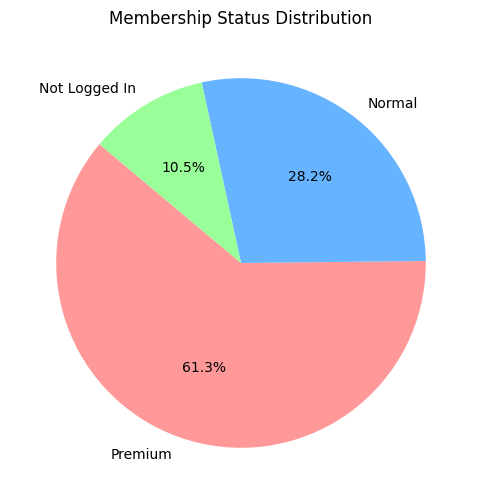

In [33]:
# Membership Status
# Calculate the distribution of membership status
membership_counts = df['membership'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(membership_counts, labels=membership_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], startangle=140)
plt.title('Membership Status Distribution')
plt.show()

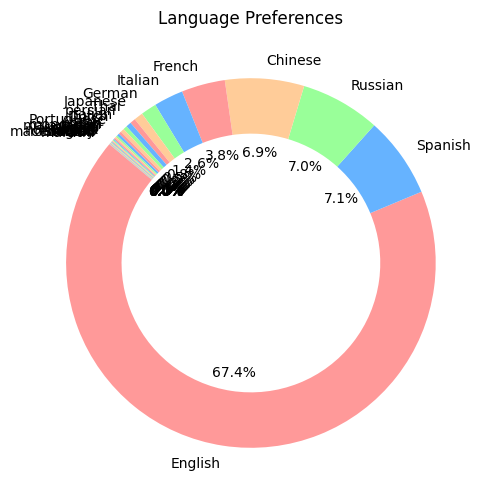

In [34]:
# Language Preferences
# Calculate the distribution of languages
language_counts = df['language'].value_counts()

# Plot Donut Chart
plt.figure(figsize=(10, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops=dict(width=0.3))
plt.title('Language Preferences')
plt.show()

In [35]:
# Check unique values in 'returned' column
print(df['returned'].unique())

['No' 'Yes']


<Figure size 1400x700 with 0 Axes>

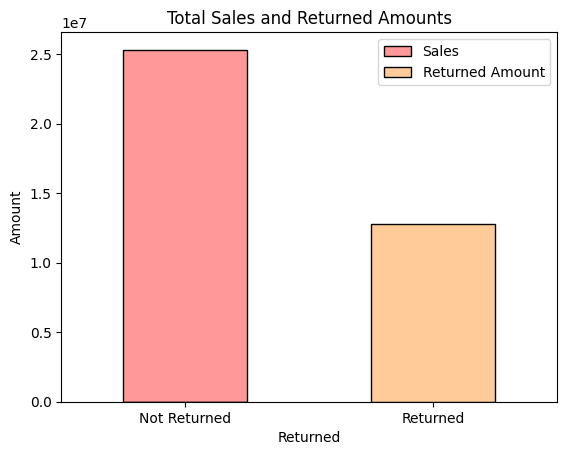

In [36]:
# Sales and Returns
# Create a new DataFrame for the stacked bar chart
stacked_data = df.groupby(['returned'])[['sales', 'returned_amount']].sum().reset_index()

# Plot
plt.figure(figsize=(14, 7))
stacked_data.set_index('returned').plot(kind='bar', stacked=True, color=[colors[0], colors[3]], edgecolor='black')
plt.title('Total Sales and Returned Amounts')
plt.xlabel('Returned')
plt.ylabel('Amount')
plt.xticks(ticks=[0, 1], labels=['Not Returned', 'Returned'], rotation=0)
plt.legend(['Sales', 'Returned Amount'])
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0e2mlui9/x40u2y2u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0e2mlui9/xwxzpv96.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95709', 'data', 'file=/tmp/tmp0e2mlui9/x40u2y2u.json', 'init=/tmp/tmp0e2mlui9/xwxzpv96.json', 'output', 'file=/tmp/tmp0e2mlui9/prophet_modela_jifme7/prophet_model-20240731114351.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:43:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:43:51 - cmdstanpy - INFO - Chain [1] done processing
INFO

<Figure size 1400x700 with 0 Axes>

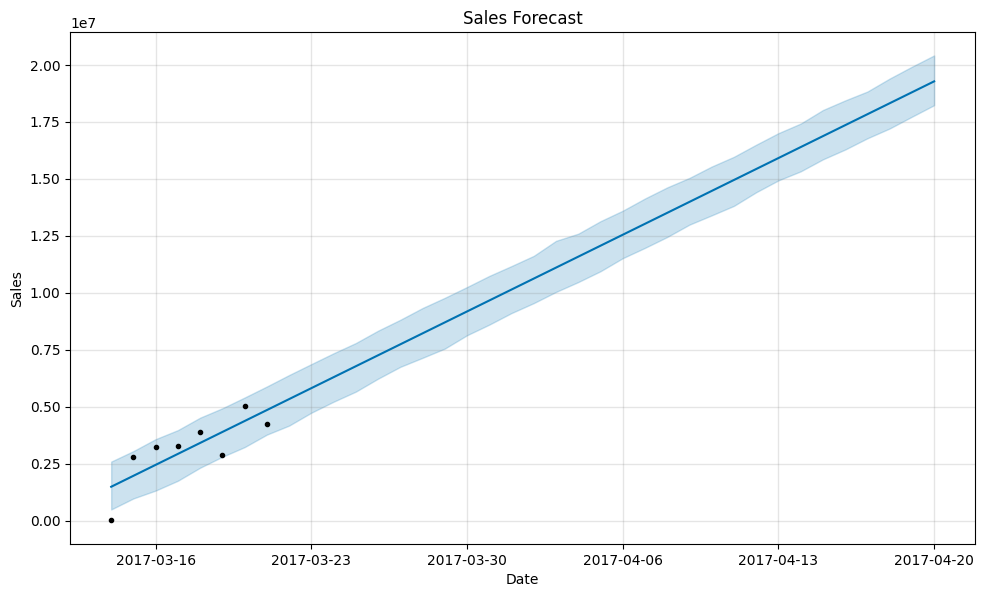

In [38]:
#Sales Forecasting
from prophet import Prophet

df['accessed_date'] = pd.to_datetime(df['accessed_date'])

# Aggregate sales data by date
sales_by_date = df.groupby(df['accessed_date'].dt.date)['sales'].sum().reset_index()

# Rename columns for Prophet
sales_by_date.columns = ['ds', 'y']

# Initialize the Prophet model
model = Prophet(daily_seasonality=True)

# Fit the model to the data
model.fit(sales_by_date)

# Create a dataframe with future dates
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
plt.figure(figsize=(14, 7))
model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

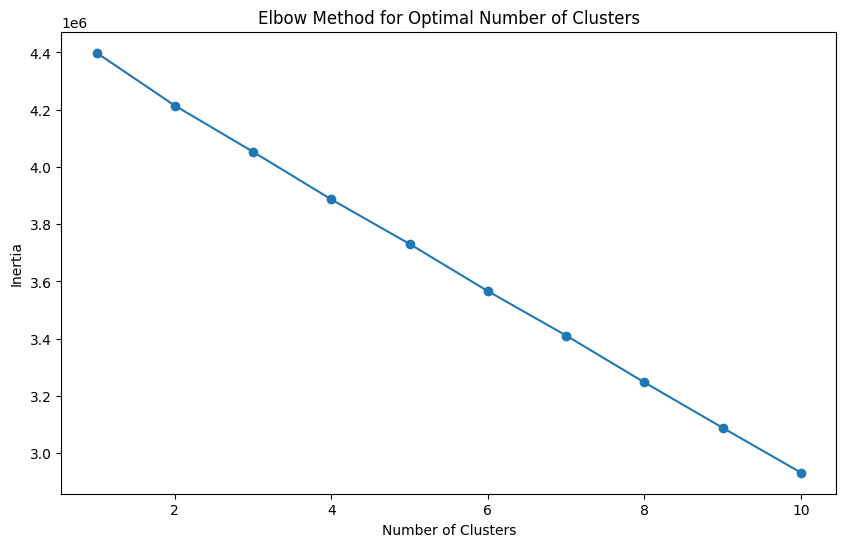

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


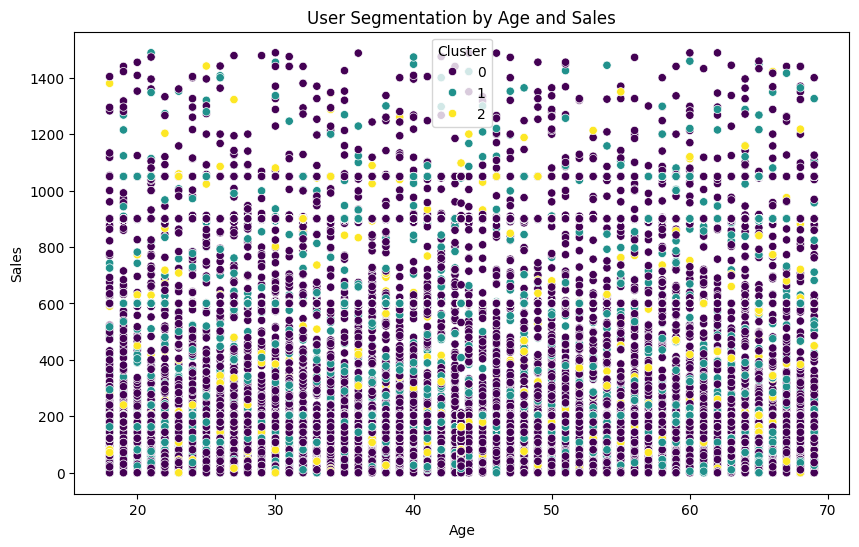

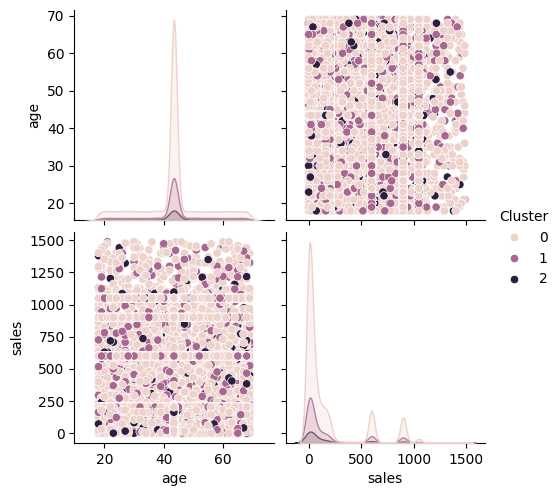

In [39]:
#User Segmentation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = df[['age', 'country', 'sales']]

# Convert categorical data to numerical (one-hot encoding for country)
features = pd.get_dummies(features, columns=['country'])

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-means clustering with the optimal number of clusters (e.g., 3 clusters)
optimal_clusters = 3  # Change this based on the elbow method plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='sales', hue='Cluster', data=df, palette='viridis')
plt.title('User Segmentation by Age and Sales')
plt.xlabel('Age')
plt.ylabel('Sales')
plt.legend(title='Cluster')
plt.show()

# Optionally, visualize the clusters in higher dimensions using pairplot
sns.pairplot(df, hue='Cluster', vars=['age', 'sales'])
plt.show()

In [46]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

aligned_df = pd.merge(sales_by_date[['y']], forecast[['yhat']], left_index=True, right_index=True, how='inner')
aligned_df.columns = ['actual_sales', 'predicted_sales']

# Extract the aligned actual and predicted sales
actual_sales = aligned_df['actual_sales']
predicted_sales = aligned_df['predicted_sales']

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_sales, predicted_sales)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_sales, predicted_sales))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 773634.7335483473
Root Mean Squared Error (RMSE): 840957.1559624665


# Summary
###Data Loading and Overview:
Load the CSV file and provide an initial overview.

###Data Cleaning:
Convert accessed_date to datetime.
Handle missing values in age.
Standardize column names.
Filter out sales outliers.

###Exploratory Data Analysis (EDA):

**Age Distribution:** Histogram.

**Sales by Country:** Bar chart with sales data by country.

**Sales by Payment Method:** Pie chart.

**Correlation Heatmap**

**Sales Over Time:** Line chart.

**Platform or Browser Used:** Bar chart with counts annotated.

**Network Protocol Usage:** Bar chart with counts annotated.

**Sales and Returns:** Stacked Bar Chart based on return status.

**Language Preferences:** Donut Chart.

**Membership Status:** Pie Chart.

**Sales Forecasting using Prophet**

**User Segmentation using K-Means Clustering**

This analysis provides a structured approach to EDA and visualization, helping data analysts practice and understand key aspects of their e-commerce logs dataset.